## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
combinedData = mouse_metadata.merge(study_results)

# Display the data table for preview
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouseCount = len(combinedData["Mouse ID"].unique())
mouseCount

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combinedData["Duplicated"] = combinedData.duplicated(subset=["Mouse ID","Timepoint"])
combinedData.loc[combinedData["Duplicated"]==True,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedData.loc[combinedData["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedData = combinedData.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleanedData= cleanedData[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
cleanedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
cleanMouseCount = len(cleanedData["Mouse ID"].unique())
cleanMouseCount

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimenGroups = cleanedData.groupby("Drug Regimen")

tumorMean = regimenGroups["Tumor Volume (mm3)"].mean()
tumorMedian = regimenGroups["Tumor Volume (mm3)"].median()
tumorVariance = regimenGroups["Tumor Volume (mm3)"].var(ddof = 0)
tumorStdDev = regimenGroups["Tumor Volume (mm3)"].std(ddof = 0)
tumorSEM = regimenGroups["Tumor Volume (mm3)"].sem(ddof = 0)

# tumorVolumeData = regimenGroups["Tumor Volume (mm3)"]
TumorVolumeStats = pd.DataFrame({
    "tumorMean" : tumorMean,
    "tumorMedian" : tumorMedian,
    "tumorVariance" : tumorVariance,
    "tumorStdDev" : tumorStdDev,
    "tumorSEM" : tumorSEM
    })
TumorVolumeStats.head()


,tumorMean,tumorMedian,tumorVariance,tumorStdDev,tumorSEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimenGroupsAgg = cleanedData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
regimenGroupsAgg.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [66]:
#Get Distribution of female vs male mice
mouseGender = cleanedData.groupby(by="Sex", as_index=False).agg({"Mouse ID": pd.Series.nunique})
mouseGender.columns = ["Sex","Number of Mice"]
mouseGender["Percent of Mice"] = round((mouseGender["Number of Mice"]/cleanMouseCount)*100,2)
mouseGender.head()

,Sex,Number of Mice,Percent of Mice
0,Female,124,49.8
1,Male,125,50.2


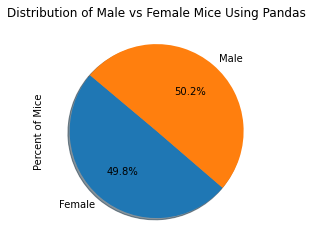

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandasGender = mouseGender[["Sex","Percent of Mice"]]
pandasGender = pandasGender.set_index("Sex")
pandasGender.plot.pie(y='Percent of Mice', title="Distribution of Male vs Female Mice Using Pandas", legend=False, \
                   autopct='%1.1f%%',shadow = True, startangle = 140)

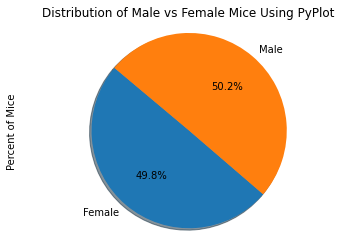

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouseGender["Sex"].tolist()
sizes = mouseGender["Percent of Mice"].tolist()
plt.pie(sizes, labels = labels, autopct='%1.1f%%',shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice Using PyPlot")
plt.ylabel("Percent of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
